# Basic Setup

In [53]:
# Import library

## wrangling
import pandas as pd
import numpy as np

## visualization
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

## warning
import warnings
warnings.filterwarnings("ignore")

## sql
import sqlite3

In [54]:
# Buat path file
dbfile = "olist.db"

# Buat koneksi SQL ke database SQLite
con = sqlite3.connect(dbfile)

# Buat kursor
cur = con.cursor()

# Baca nama semua tabel
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

# Tampilkan nama semua tabel
print(table_list)

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


# Read All Tables

### 1. Order (olist_order_dataset)

In [55]:
# Akses tabel olist_order dari database
order = pd.read_sql_query("SELECT * FROM olist_order_dataset", con)

# Hapus kolom "index"
order.drop(["index"], axis=1, inplace=True)

# Tampilkan tabel order
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### 2. Order Items (olist_order_items_dataset)

In [56]:
# Akses tabel olist_order_items dari database
order_items = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", con)

# Hapus kolom "index"
order_items.drop(["index"], axis=1, inplace=True)

# Tampilkan tabel order_items
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


### 3. Product (olist_products_dataset)

In [57]:
# Akses tabel olist_products dari database
products = pd.read_sql_query("SELECT * FROM olist_products_dataset", con)

# Hapus kolom "index"
products.drop(["index"], axis=1, inplace=True)

# Tampilkan tabel products
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### 4. Product_translation (product_category_name_translation)

In [58]:
# Akses tabel product_category_name_translation dari database
product_translation = pd.read_sql_query("SELECT * FROM product_category_name_translation", con)

# Hapus kolom "index"
product_translation.drop(["index"], axis=1, inplace=True)

# Tampilkan tabel product_translation
product_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Exploratory Data Analysis (EDA)

## Objektif:

1. Bagaimana popularitas kategori produk yang dipesan?
2. Bagaimana potensi kehilangan pendapatan (revenue loss) dari produk yang dipesan?
3. Bagaimana trend pendapatan (revenue) tiap kategori produk selama satu tahun terakhir?
4. Bagaimana trend jumlah produk yang berhasil dikirim ke customer selama setahun terakhir?
5. Bagaimana trend total pendapatan (revenue) perusahaan selama setahun terakhir?

# Data Wrangling

In [59]:
# Gabungkan tabel order_items, products, product_translation, dan order
order_details = pd.merge(order_items, products, on="product_id", how="left")
order_details = pd.merge(order_details, product_translation, on="product_category_name", how="left")
order_details = pd.merge(order_details, order, on="order_id", how="left")

# Tampilkan tabel gabungan
order_details

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_height_cm,product_width_cm,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,9.0,14.0,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,30.0,40.0,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,13.0,33.0,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,10.0,15.0,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,40.0,30.0,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,...,15.0,40.0,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,...,26.0,38.0,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,...,24.0,19.0,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,...,20.0,20.0,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [60]:
# Tampilkan informasi nama kolom dari data gabungan
order_details.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [61]:
# Buat list berisi nama kolom yang akan dihapus
drop_col = ['seller_id','shipping_limit_date','product_name_lenght',
            'product_description_lenght', 'product_photos_qty', 'product_weight_g',
            'product_length_cm', 'product_height_cm', 'product_width_cm','customer_id', 
            'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
            'order_estimated_delivery_date']

# Hapus kolom-kolom dalam list dari tabel data
order_details = order_details.drop(drop_col, axis=1)

# Tambahkan kolom revenue hasil penjumlahan price dan freight_value
order_details["revenue"] = order_details["price"] + order_details["freight_value"]

# Tampilkan tabel data
order_details

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english,order_status,order_purchase_timestamp,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool_stuff,cool_stuff,delivered,2017-09-13 08:59:02,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet_shop,pet_shop,delivered,2017-04-26 10:53:06,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,moveis_decoracao,furniture_decor,delivered,2018-01-14 14:33:31,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumaria,perfumery,delivered,2018-08-08 10:00:35,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,ferramentas_jardim,garden_tools,delivered,2017-02-04 13:57:51,218.04
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,utilidades_domesticas,housewares,delivered,2018-04-23 13:57:06,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,36.53,informatica_acessorios,computers_accessories,delivered,2018-07-14 10:26:46,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,16.95,esporte_lazer,sports_leisure,delivered,2017-10-23 17:07:56,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72,informatica_acessorios,computers_accessories,delivered,2017-08-14 23:02:59,64.71


In [62]:
# Tampilkan informasi data
order_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   price                          112650 non-null  float64
 4   freight_value                  112650 non-null  float64
 5   product_category_name          111047 non-null  object 
 6   product_category_name_english  111023 non-null  object 
 7   order_status                   112650 non-null  object 
 8   order_purchase_timestamp       112650 non-null  object 
 9   revenue                        112650 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 9.5+ MB


### Finding and Handling Missing Values

In [63]:
# Cek dan hitung banyaknya missing value tiap kolom
order_details.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
product_category_name            1603
product_category_name_english    1627
order_status                        0
order_purchase_timestamp            0
revenue                             0
dtype: int64

In [64]:
# Cek selisih total missing values antara dua kolom nama kategori produk
# Adanya selisih berarti terdapat kategori produk yang memiliki nama Portugis namun tidak ada nama Inggris
order_details[["product_category_name", "product_category_name_english"]].loc[
    (order_details["product_category_name"].notna()) & (order_details["product_category_name_english"].isna())]

,product_category_name,product_category_name_english
3228,portateis_cozinha_e_preparadores_de_alimentos,NaN
12976,pc_gamer,NaN
12977,pc_gamer,NaN
13025,portateis_cozinha_e_preparadores_de_alimentos,NaN
18629,pc_gamer,NaN
19702,portateis_cozinha_e_preparadores_de_alimentos,NaN
31806,pc_gamer,NaN
32887,pc_gamer,NaN
36976,portateis_cozinha_e_preparadores_de_alimentos,NaN
37083,portateis_cozinha_e_preparadores_de_alimentos,NaN


In [65]:
# Isi missing values hasil pengecekan ketiadaan nama Inggris

## Buat dictionary pengisi missing value
translate = {"pc_gamer":"pc_gamer", 
             "portateis_cozinha_e_preparadores_de_alimentos":"kitchen_and_food_preparators_portables"}

## Isi missing values kategori produk yang memiliki nama Portugis namun tidak ada nama Inggris
order_details["product_category_name_english"] = order_details["product_category_name_english"]\
                                                .fillna(order_details["product_category_name"].map(translate))

# Cek dan hitung kembali banyaknya missing value tiap kolom
order_details.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
product_category_name            1603
product_category_name_english    1603
order_status                        0
order_purchase_timestamp            0
revenue                             0
dtype: int64

In [66]:
# Tampilkan baris data yang memiliki missing value
order_details.loc[(order_details["product_category_name"].isna()) | (order_details["product_category_name_english"].isna())]

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english,order_status,order_purchase_timestamp,revenue
123,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,7.79,7.78,None,NaN,delivered,2017-09-26 15:24:03,15.57
125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,7.60,10.96,None,NaN,delivered,2017-02-13 16:18:07,18.56
132,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,122.99,15.61,None,NaN,delivered,2018-02-27 12:16:30,138.60
142,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,20.30,16.79,None,NaN,delivered,2018-01-18 17:05:30,37.09
171,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,56.00,14.14,None,NaN,delivered,2018-02-17 14:22:34,70.14
...,...,...,...,...,...,...,...,...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,122.99,15.61,None,NaN,delivered,2018-01-26 14:41:14,138.60
112333,ff3024474be86400847879103757d1fd,1,f9b1795281ce51b1cf39ef6d101ae8ab,39.90,9.94,None,NaN,delivered,2017-11-11 15:18:16,49.84
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,1,b61d1388a17e3f547d2bc218df02335b,139.00,21.42,None,NaN,delivered,2017-05-03 07:08:50,160.42
112438,ff7b636282b98e0aa524264b295ed928,1,431df35e52c10451171d8037482eeb43,49.90,15.11,None,NaN,delivered,2018-02-17 14:46:29,65.01


In [67]:
# Isi missing value kategori produk sebagai kategori "unknown"
order_details["product_category_name"] = order_details["product_category_name"].fillna("unknown")
order_details["product_category_name_english"] = order_details["product_category_name_english"].fillna("unknown")

# Tampilkan informasi terbaru tabel data
order_details

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english,order_status,order_purchase_timestamp,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool_stuff,cool_stuff,delivered,2017-09-13 08:59:02,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet_shop,pet_shop,delivered,2017-04-26 10:53:06,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,moveis_decoracao,furniture_decor,delivered,2018-01-14 14:33:31,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumaria,perfumery,delivered,2018-08-08 10:00:35,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,ferramentas_jardim,garden_tools,delivered,2017-02-04 13:57:51,218.04
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,utilidades_domesticas,housewares,delivered,2018-04-23 13:57:06,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,36.53,informatica_acessorios,computers_accessories,delivered,2018-07-14 10:26:46,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,16.95,esporte_lazer,sports_leisure,delivered,2017-10-23 17:07:56,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72,informatica_acessorios,computers_accessories,delivered,2017-08-14 23:02:59,64.71


In [68]:
# Tampilkan informasi terbaru tabel data
order_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   price                          112650 non-null  float64
 4   freight_value                  112650 non-null  float64
 5   product_category_name          112650 non-null  object 
 6   product_category_name_english  112650 non-null  object 
 7   order_status                   112650 non-null  object 
 8   order_purchase_timestamp       112650 non-null  object 
 9   revenue                        112650 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 9.5+ MB


### Finding and Handling Duplicate

In [69]:
# Cek dan hitung banyaknya duplikat pada data
order_details.duplicated().sum()

0

### Finding and Handling Inconsistent Format

In [70]:
# Cek data unik pada kolom kategori produk 
unique_data1 = order_details["product_category_name_english"].unique()

# Urutkan dan tampilkan data unik
print(sorted(unique_data1))

['agro_industry_and_commerce', 'air_conditioning', 'art', 'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'books_imported', 'books_technical', 'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'costruction_tools_tools', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food', 'food_drink', 'furniture_bedroom', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'garden_tools', 'health_beauty', 'home_appliances', 'home_appliances_2', 'home_comfort_2', 'home_confort', 'home_construction', 'housewares', 'indust

In [71]:
# Buat dictionary mapping inkonsisten untuk penyeragaman
map_inkonsisten = {"home_appliances_2":"home_appliances", 
                   "home_comfort_2":"home_comfort", 
                   "home_confort":"home_comfort"}

# Lakukan penyeragaman sesuai hasil mapping
order_details["product_category_name_english"]= order_details["product_category_name_english"]\
                                                .replace(map_inkonsisten)

# Tampilkan data unik hasil handling inconsistent format
unique_data1_clean = order_details["product_category_name_english"].unique()

# Urutkan dan tampilkan data unik
print(sorted(unique_data1_clean))

['agro_industry_and_commerce', 'air_conditioning', 'art', 'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'books_imported', 'books_technical', 'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'costruction_tools_tools', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food', 'food_drink', 'furniture_bedroom', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'garden_tools', 'health_beauty', 'home_appliances', 'home_comfort', 'home_construction', 'housewares', 'industry_commerce_and_business', 'kitchen_and

In [72]:
# Cek data unik pada kolom kategori produk 
unique_data2 = order_details["order_status"].unique()

# Urutkan dan tampilkan data unik
print(sorted(unique_data2))

['approved', 'canceled', 'delivered', 'invoiced', 'processing', 'shipped', 'unavailable']


In [73]:
# Casting tipe data kolom order_purchase_timestamp menjadi datetime
order_details["order_purchase_timestamp"] = order_details["order_purchase_timestamp"].astype("datetime64")

# Cek kembali informasi tabel setelah handling inconsistent format
order_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   price                          112650 non-null  float64       
 4   freight_value                  112650 non-null  float64       
 5   product_category_name          112650 non-null  object        
 6   product_category_name_english  112650 non-null  object        
 7   order_status                   112650 non-null  object        
 8   order_purchase_timestamp       112650 non-null  datetime64[ns]
 9   revenue                        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 

### Data Preparation

In [74]:
# Ubah nama kolom 
order_details = order_details.rename({"product_category_name_english":"product_category"},axis=1)

# Tampilkan tabel data
order_details

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_category,order_status,order_purchase_timestamp,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool_stuff,cool_stuff,delivered,2017-09-13 08:59:02,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet_shop,pet_shop,delivered,2017-04-26 10:53:06,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,moveis_decoracao,furniture_decor,delivered,2018-01-14 14:33:31,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumaria,perfumery,delivered,2018-08-08 10:00:35,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,ferramentas_jardim,garden_tools,delivered,2017-02-04 13:57:51,218.04
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,utilidades_domesticas,housewares,delivered,2018-04-23 13:57:06,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,36.53,informatica_acessorios,computers_accessories,delivered,2018-07-14 10:26:46,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,16.95,esporte_lazer,sports_leisure,delivered,2017-10-23 17:07:56,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72,informatica_acessorios,computers_accessories,delivered,2017-08-14 23:02:59,64.71


# Exploratory Data Analysis (EDA)

## Objektif:

1. Bagaimana popularitas kategori produk yang dipesan?
2. Bagaimana potensi kehilangan pendapatan (revenue loss) dari produk yang dipesan?
3. Bagaimana trend pendapatan (revenue) tiap kategori produk selama satu tahun terakhir?
4. Bagaimana trend jumlah produk yang berhasil dikirim ke customer selama setahun terakhir?
5. Bagaimana trend jumlah keberhasilan penyelesaian order selama setahun terakhir?

## Objektif #1: Bagaimana popularitas kategori produk yang dipesan?

### Data Preparation

In [75]:
# Filter kolom yang akan dianalisis
products_ordered = order_details.loc[:,["order_id", "order_item_id","product_category"]]
# Tampilkan tabel gabungan
products_ordered

,order_id,order_item_id,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,garden_tools
...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,computers_accessories


In [76]:
# Ubah nama kolom 
products_ordered = products_ordered.rename({"order_id":"order_count"}, axis=1)

# Hitung banyaknya order untuk tiap kategori produk
products_ordered_count = products_ordered[["product_category","order_count"]].groupby("product_category").count()

# Tampilkan data banyaknya order tiap kategori produk
products_ordered_count

,order_count
product_category,
agro_industry_and_commerce,212
air_conditioning,297
art,209
arts_and_craftmanship,24
audio,364
...,...
tablets_printing_image,83
telephony,4545
toys,4117


### Visualization 1 - Most Ordered Category Product

In [77]:
# Urutkan hasil grouping dari yang terbanyak dipesan dan reset index
most_ordered = products_ordered_count.sort_values("order_count", ascending=False).reset_index()

# Tampilkan hasil
most_ordered.head(10)

,product_category,order_count
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


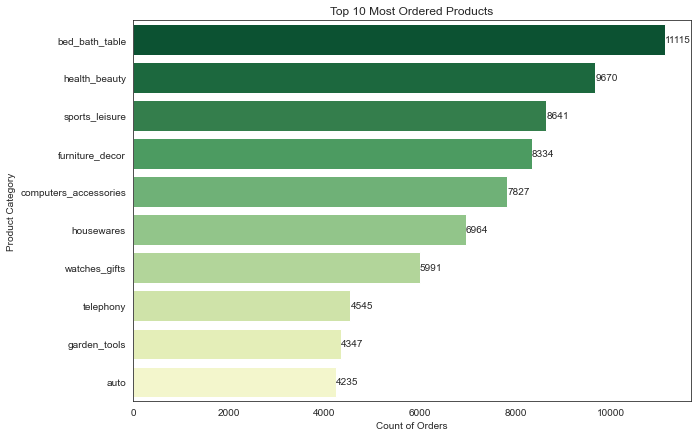

In [78]:
# Atur ukuran gambar
plt.figure(figsize=(10, 7))

# Atur style plot
sns.set_style("white")

# Buat barplot 10 kategori produk paling banyak dipesan
ax1 = sns.barplot(data=most_ordered[:10], x="order_count", 
                     y="product_category", palette="YlGn_r")

# Tampilkan label data
ax1.bar_label(ax1.containers[0])

# Tambahkan judul, label x-axis, dan label y-axis
plt.title("Top 10 Most Ordered Products")
plt.xlabel("Count of Orders")
plt.ylabel("Product Category")

# Tampilkan plot
plt.show()

### Visualization 2 - Least Ordered Category Product

In [79]:
# Urutkan hasil grouping dari yang tersedikit dipesan dan reset index
least_ordered = products_ordered_count.sort_values("order_count").reset_index()

# Tampilkan data
least_ordered.head(10)

,product_category,order_count
0,security_and_services,2
1,fashion_childrens_clothes,8
2,pc_gamer,9
3,la_cuisine,14
4,cds_dvds_musicals,14
5,kitchen_and_food_preparators_portables,15
6,arts_and_craftmanship,24
7,fashion_sport,30
8,flowers,33
9,furniture_mattress_and_upholstery,38


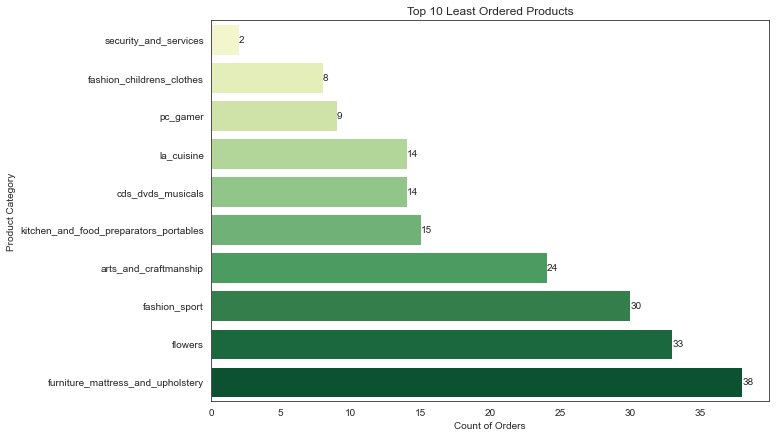

In [80]:
# Atur ukuran gambar
plt.figure(figsize=(10, 7))

# Atur style plot
sns.set_style("white")

# Buat barplot 10 kategori produk paling sedikit dipesan
ax1 = sns.barplot(data=least_ordered[:10], x="order_count", 
                       y="product_category", palette="YlGn")

# Tampilkan label data
ax1.bar_label(ax1.containers[0])

# Tambahkan judul, label x-axis, dan label y-axis
plt.title("Top 10 Least Ordered Products")
plt.xlabel("Count of Orders")
plt.ylabel("Product Category")

# Tampilkan plot
plt.show()

## Objektif #2: Bagaimana potensi kehilangan pendapatan (revenue loss) tiap produk yang dipesan?

### Data Preparation

In [81]:
# Tampilkan tabel order_details
order_details.head()

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_category,order_status,order_purchase_timestamp,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool_stuff,cool_stuff,delivered,2017-09-13 08:59:02,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet_shop,pet_shop,delivered,2017-04-26 10:53:06,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,moveis_decoracao,furniture_decor,delivered,2018-01-14 14:33:31,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumaria,perfumery,delivered,2018-08-08 10:00:35,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,ferramentas_jardim,garden_tools,delivered,2017-02-04 13:57:51,218.04


In [82]:
# Tampilkan tabel order
revenue_loss = order_details.loc[(order_details["order_status"]=="canceled") | (order_details["order_status"]=="unavailable")]

# Filter kolom data yang perlu dipakai
revenue_loss = revenue_loss.loc[:, ["order_id","product_category","revenue"]].reset_index(drop=True)

# Tampilkan data
revenue_loss

,order_id,product_category,revenue
0,00310b0c75bb13015ec4d82d341865a4,housewares,55.28
1,00ae7a8b4936674ebb701d4a23719a79,auto,37.16
2,00ff0cf5583758e6964723e42f111bf4,health_beauty,170.15
3,013e9c654a339d80b53513da3c1ea437,housewares,123.01
4,0148d3df00cebda592d4e5f966e300cc,housewares,17.38
...,...,...,...
544,fb265b2dc558a56445dfc48f8224e201,health_beauty,131.12
545,fc3c882665c98c9b737a7b1b3aa6c553,bed_bath_table,37.78
546,fdbbb1715d0c62c714e2a8178b95dd54,health_beauty,69.14
547,fe9aa3b22b4d65ccbaffb57984bc12fb,toys,47.68


In [83]:
# Tampilkan informasi data
revenue_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          549 non-null    object 
 1   product_category  549 non-null    object 
 2   revenue           549 non-null    float64
dtypes: float64(1), object(2)
memory usage: 13.0+ KB


In [84]:
# Hitung jumlah revenue loss berdasarkan kategori produk
revenue_loss_category = revenue_loss[["product_category","revenue"]].groupby("product_category").sum()

# Reset index
revenue_loss_category = revenue_loss_category.reset_index()

# Urutkan hasil perhitungan
revenue_loss_category = revenue_loss_category.sort_values("revenue", ascending=False).reset_index(drop=True)

# Tampilkan data jumlah revenue loss berdasarkan order_statusnya
revenue_loss_category.head(10)

,product_category,revenue
0,cool_stuff,15243.71
1,sports_leisure,9411.85
2,computers_accessories,8330.82
3,watches_gifts,7249.14
4,auto,6777.68
5,housewares,6362.63
6,garden_tools,4694.01
7,toys,4589.26
8,musical_instruments,4116.05
9,health_beauty,3582.29


### Visualization

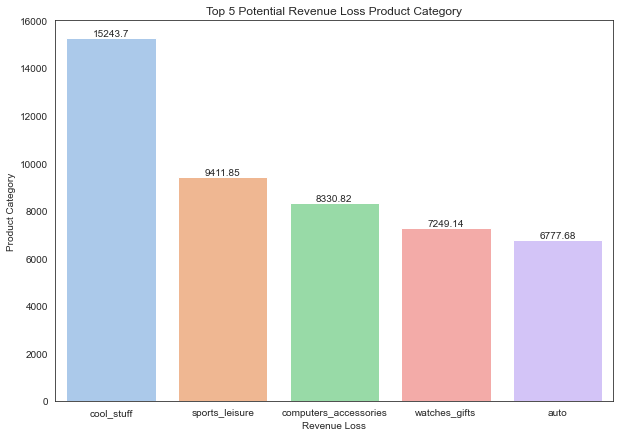

In [85]:
# Atur ukuran gambar
plt.figure(figsize=(10, 7))

# Atur style plot
sns.set_style("white")

# Buat barplot 10 kategori produk paling banyak dipesan
ax1 = sns.barplot(data=revenue_loss_category[:5], x="product_category", 
                     y="revenue", palette="pastel")

# Tampilkan label data
ax1.bar_label(ax1.containers[0])

# Tambahkan judul, label x-axis, dan label y-axis
plt.title("Top 5 Potential Revenue Loss Product Category")
plt.xlabel("Revenue Loss")
plt.ylabel("Product Category")

# Tampilkan plot
plt.show()

## Objektif #3: Bagaimana trend total pendapatan (revenue) tiap kategori produk selama satu tahun terakhir?

### Data Preparation

In [86]:
# Tampilkan tabel detail order
order_details.head()

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_category,order_status,order_purchase_timestamp,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool_stuff,cool_stuff,delivered,2017-09-13 08:59:02,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet_shop,pet_shop,delivered,2017-04-26 10:53:06,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,moveis_decoracao,furniture_decor,delivered,2018-01-14 14:33:31,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumaria,perfumery,delivered,2018-08-08 10:00:35,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,ferramentas_jardim,garden_tools,delivered,2017-02-04 13:57:51,218.04


In [87]:
# Filter data berdasarkan status keberhasilan pengiriman
delivered_order = order_details.loc[(order_details["order_status"]=="delivered")]

# Ekstrak informasi bulan tahun (month of year)
delivered_order["month_year"] = delivered_order["order_purchase_timestamp"].dt.to_period('M')

# Casting tipe data kolom month_year menjadi datetime
delivered_order["month_year"] = delivered_order["month_year"].astype("string")

# Filter data berdasarkan waktu setahun terakhir dan bulan telah selesai secara penuh
delivered_order_1year = delivered_order.loc[(delivered_order["order_purchase_timestamp"] <= "2018-07-31")\
                                            & (delivered_order["order_purchase_timestamp"] >= "2017-08-01")]\
                                            .reset_index(drop=True)

# Filter kolom yang akan dianalisis
products_delivered_revenue = delivered_order_1year.loc[:,["month_year","product_category", "revenue"]]

# Reset index
products_delivered_revenue = products_delivered_revenue.reset_index(drop=True)

# Tampilkan data
products_delivered_revenue

,month_year,product_category,revenue
0,2017-09,cool_stuff,72.19
1,2018-01,furniture_decor,216.87
2,2017-12,telephony,31.75
3,2018-07,garden_tools,880.75
4,2018-03,health_beauty,157.60
...,...,...,...
82218,2018-04,housewares,343.40
82219,2018-07,computers_accessories,386.53
82220,2017-10,sports_leisure,116.85
82221,2017-08,computers_accessories,64.71


In [88]:
# Cek nilai Min dan Max Datetime pada dataframe
min(delivered_order_1year.order_purchase_timestamp), max(delivered_order_1year.order_purchase_timestamp)

(Timestamp('2017-08-01 00:02:01'), Timestamp('2018-07-30 23:54:48'))

In [89]:
# Tampilkan informasi tabel data
products_delivered_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82223 entries, 0 to 82222
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   month_year        82223 non-null  string 
 1   product_category  82223 non-null  object 
 2   revenue           82223 non-null  float64
dtypes: float64(1), object(1), string(1)
memory usage: 1.9+ MB


In [90]:
# Hitung revenue tiap kategori produk
revenue_products = products_delivered_revenue[["product_category","revenue"]].groupby("product_category").sum()

# Urutkan hasil grouping dan reset index
revenue_products = revenue_products.sort_values("revenue", ascending=False).reset_index()

# Ambil lima data category product penghasil revenue terbanyak
top5_revenue = revenue_products.head()

# Tampilkan data total revenue tiap kategori produk
top5_revenue

,product_category,revenue
0,health_beauty,1045473.52
1,watches_gifts,1005120.74
2,bed_bath_table,911705.15
3,sports_leisure,846365.25
4,computers_accessories,776360.34


In [91]:
# Definisikan kondisi filter data berdasarkan top revenue products
kondisi1 = products_delivered_revenue["product_category"]=="health_beauty"
kondisi2 = products_delivered_revenue["product_category"]=="watches_gifts"
kondisi3 = products_delivered_revenue["product_category"]=="bed_bath_table"
kondisi4 = products_delivered_revenue["product_category"]=="sports_leisure"
kondisi5 = products_delivered_revenue["product_category"]=="computers_accessories"

# Filter data berdasarkan 5 kategori produk penghasil revenue terbanyak dan riset index
top_products_revenue = products_delivered_revenue.loc[kondisi1|kondisi2|kondisi3|kondisi4|kondisi5]\
                      .reset_index(drop=True)

# Tampilkan data hasil filter
top_products_revenue

,month_year,product_category,revenue
0,2018-03,health_beauty,157.60
1,2018-03,health_beauty,68.87
2,2018-07,bed_bath_table,97.32
3,2017-08,sports_leisure,112.71
4,2018-03,bed_bath_table,56.78
...,...,...,...
32309,2017-10,watches_gifts,89.19
32310,2018-07,computers_accessories,386.53
32311,2017-10,sports_leisure,116.85
32312,2017-08,computers_accessories,64.71


In [92]:
# Ringkas data menjadi bentuk pivot
monthly_revenue = top_products_revenue.pivot_table(values="revenue",index=["month_year"],
                                                        columns=["product_category"],aggfunc="sum")

# Tampilkan pivot data 
monthly_revenue

product_category,bed_bath_table,computers_accessories,health_beauty,sports_leisure,watches_gifts
month_year,,,,,
2017-08,65628.16,39548.23,55281.78,48309.09,39578.95
2017-09,61723.02,32972.21,58123.19,57463.77,48992.89
2017-10,55209.90,48090.44,47414.29,56797.18,69770.94
2017-11,104963.58,79910.93,88629.80,73149.22,103135.30
2017-12,59378.49,42967.29,68907.78,68184.69,74898.08
2018-01,89658.07,93086.53,81989.68,99078.58,79185.85
2018-02,71610.43,117216.65,95463.05,86346.83,66599.36
2018-03,82243.30,99444.68,97035.83,95994.77,104292.26
2018-04,85565.96,67269.65,104332.90,76860.92,96089.14


### Visualization

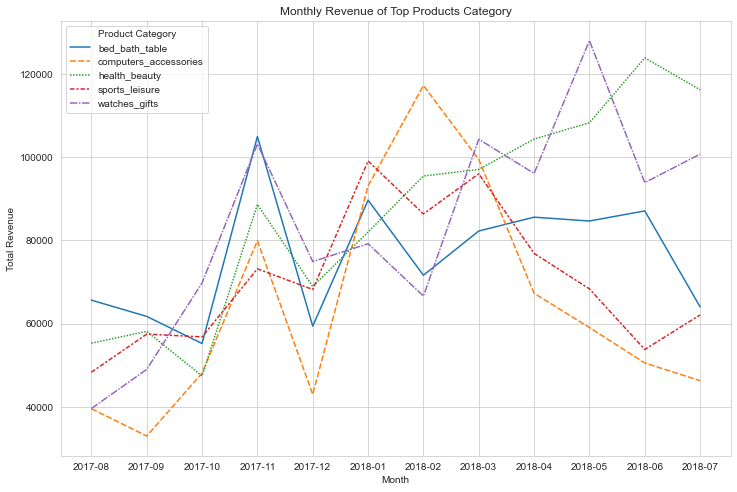

In [93]:
# Atur ukuran gambar
plt.figure(figsize=(12, 8))

# Atur style plot
sns.set_style("whitegrid")

# Buat lineplot trend total revenue dari top 5 products
ax1 = sns.lineplot(data=monthly_revenue)

# Tambahkan judul, label x-axis, dan label y-axis
plt.title("Monthly Revenue of Top Products Category")
plt.xlabel("Month")
plt.ylabel("Total Revenue")

# Tambahkan nama legend
plt.legend(title="Product Category")

# Tampilkan plot
plt.show()

## Objektif #4: Bagaimana trend jumlah produk yang berhasil dikirim ke customer selama setahun terakhir?

### Data Preparation

In [94]:
# Tampilkan data delivered order setahun terakhir
delivered_order_1year

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_category,order_status,order_purchase_timestamp,revenue,month_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool_stuff,cool_stuff,delivered,2017-09-13 08:59:02,72.19,2017-09
1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,moveis_decoracao,furniture_decor,delivered,2018-01-14 14:33:31,216.87,2018-01
2,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,11.85,telefonia,telephony,delivered,2017-12-10 11:53:48,31.75,2017-12
3,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,810.00,70.75,ferramentas_jardim,garden_tools,delivered,2018-07-04 12:08:27,880.75,2018-07
4,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,145.95,11.65,beleza_saude,health_beauty,delivered,2018-03-19 18:40:33,157.60,2018-03
...,...,...,...,...,...,...,...,...,...,...,...
82218,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,utilidades_domesticas,housewares,delivered,2018-04-23 13:57:06,343.40,2018-04
82219,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,36.53,informatica_acessorios,computers_accessories,delivered,2018-07-14 10:26:46,386.53,2018-07
82220,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,16.95,esporte_lazer,sports_leisure,delivered,2017-10-23 17:07:56,116.85,2017-10
82221,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72,informatica_acessorios,computers_accessories,delivered,2017-08-14 23:02:59,64.71,2017-08


In [95]:
# Hitung banyaknya produk yang berhasil dikirim tiap bulan
delivered_products_1year = delivered_order_1year[["month_year","order_id"]].groupby("month_year").count().reset_index()

# Ubah nama kolom 
delivered_products_1year = delivered_products_1year.rename({"order_id":"product_count"}, axis=1)

# Tampilkan data banyaknya delivered products selama setahun terakhir
delivered_products_1year

,month_year,product_count
0,2017-08,4797
1,2017-09,4737
2,2017-10,5214
3,2017-11,8475
4,2017-12,6187
5,2018-01,8037
6,2018-02,7518
7,2018-03,8017
8,2018-04,7827
9,2018-05,7810


### Visualization

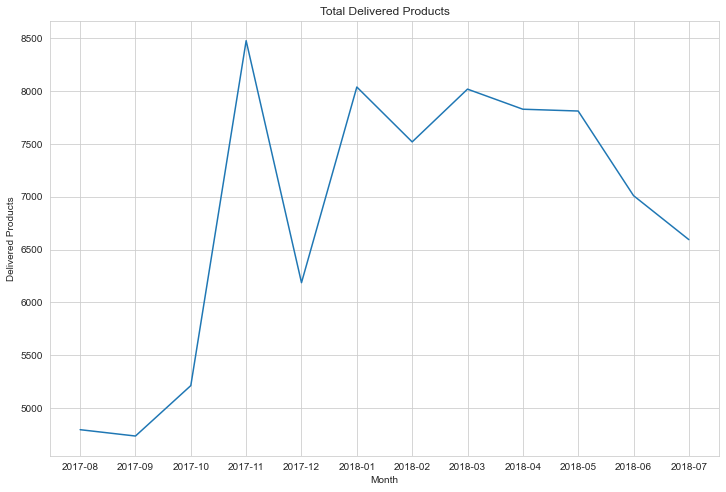

In [96]:
# Atur ukuran gambar
plt.figure(figsize=(12, 8))

# Atur style plot
sns.set_style("whitegrid")

# Buat lineplot trend banyaknya produk yang dikirim setahun terakhir
ax1 = sns.lineplot(x="month_year", y="product_count", data=delivered_products_1year)

# Tambahkan judul, label x-axis, dan label y-axis
plt.title("Total Delivered Products")
plt.xlabel("Month")
plt.ylabel("Delivered Products")

# Tampilkan plot
plt.show()

## Objektif #5: Bagaimana trend total pendapatan (revenue) perusahaan selama setahun terakhir?

### Data Preparation

In [97]:
# Tampilkan data delivered order setahun terakhir
delivered_order_1year

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_category,order_status,order_purchase_timestamp,revenue,month_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool_stuff,cool_stuff,delivered,2017-09-13 08:59:02,72.19,2017-09
1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,moveis_decoracao,furniture_decor,delivered,2018-01-14 14:33:31,216.87,2018-01
2,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,11.85,telefonia,telephony,delivered,2017-12-10 11:53:48,31.75,2017-12
3,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,810.00,70.75,ferramentas_jardim,garden_tools,delivered,2018-07-04 12:08:27,880.75,2018-07
4,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,145.95,11.65,beleza_saude,health_beauty,delivered,2018-03-19 18:40:33,157.60,2018-03
...,...,...,...,...,...,...,...,...,...,...,...
82218,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,utilidades_domesticas,housewares,delivered,2018-04-23 13:57:06,343.40,2018-04
82219,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,36.53,informatica_acessorios,computers_accessories,delivered,2018-07-14 10:26:46,386.53,2018-07
82220,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,16.95,esporte_lazer,sports_leisure,delivered,2017-10-23 17:07:56,116.85,2017-10
82221,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72,informatica_acessorios,computers_accessories,delivered,2017-08-14 23:02:59,64.71,2017-08


In [98]:
# Hitung total revenue bulanan dari produk yang berhasil dikirim selama setahun terakhir
delivered_revenue = delivered_order_1year[["month_year","revenue"]].groupby("month_year").sum().reset_index()

# Tampilkan data total revenue bulanan
delivered_revenue

,month_year,revenue
0,2017-08,645832.36
1,2017-09,701077.49
2,2017-10,751117.01
3,2017-11,1153364.20
4,2017-12,843078.29
5,2018-01,1077887.46
6,2018-02,966168.41
7,2018-03,1120598.24
8,2018-04,1132878.93
9,2018-05,1128774.52


### Visualization

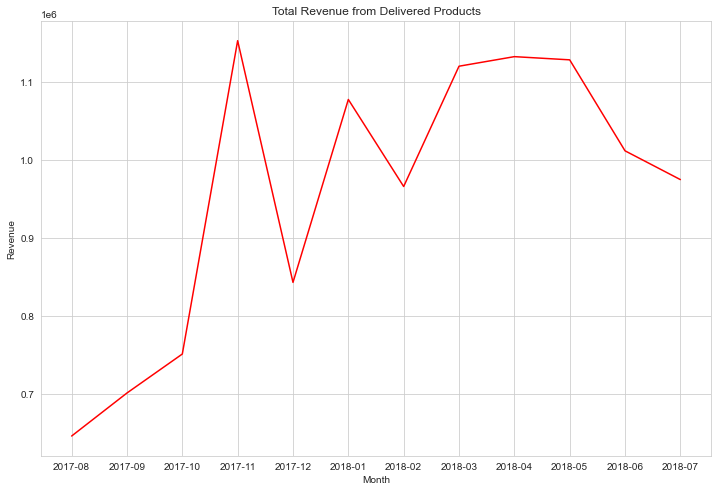

In [99]:
# Atur ukuran gambar
plt.figure(figsize=(12, 8))

# Atur style plot
sns.set_style("whitegrid")

# Buat lineplot trend total revenue dari delivered products
ax1 = sns.lineplot(x="month_year", y="revenue", 
                   data=delivered_revenue, color='Red')

# Tambahkan judul, label x-axis, dan label y-axis
plt.title("Total Revenue from Delivered Products")
plt.xlabel("Month")
plt.ylabel("Revenue")

# Tampilkan plot
plt.show()

### Visualization
#### Comparison between Delivered Products and Total Revenue

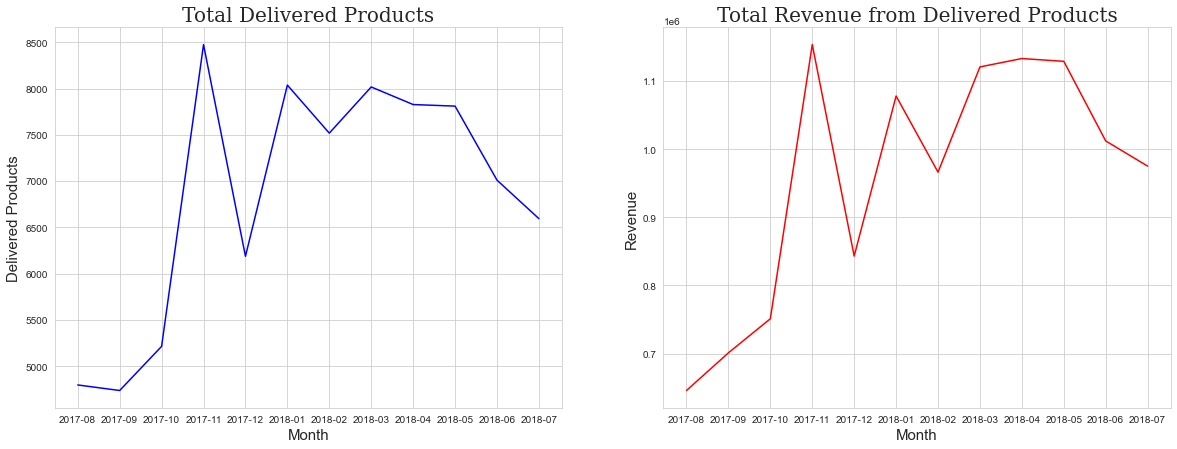

In [100]:
# Buat subplots
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

# Membuat lineplot
sns.lineplot(x="month_year", y="product_count", 
            data=delivered_products_1year, color="Blue",
            ax = ax[0])

# Melakukan styling pada subplot pertama (axes 0)
## Menambahkan judul plot
ax[0].set_title("Total Delivered Products", fontsize = 20, fontfamily = 'serif')
## Mengubah label y
ax[0].set_ylabel("Delivered Products", fontsize = 15)
## Mengubah label x
ax[0].set_xlabel("Month", fontsize = 15)

# Membuat lineplot
sns.lineplot(x="month_year", y="revenue", 
             data=delivered_revenue, color="Red",
             ax = ax[1])

# Melakukan styling pada subplot kedua (axes 1)
## Menambahkan judul plot
ax[1].set_title("Total Revenue from Delivered Products", fontsize = 20, fontfamily = 'serif')
## Mengubah label y
ax[1].set_ylabel("Revenue", fontsize = 15)
## Mengubah label x
ax[1].set_xlabel("Month", fontsize = 15)

# Tampilkan hasil
plt.show()
